# <center>Plotting Data with Pandas</center>

<center>Dr. W.J.B. Mattingly</center>

<center>Smithsonian Data Science Lab and United States Holocaust Memorial Museum</center>

<center>August 2021</center>

## Covered in this Chapter

1) Key Ways to Plot Data in Pandas<br>
2) How to Create a Bar or Barh Graph<br>
3) How to Create a Pie Chart<br>
4) How to Plot Data in a Scatter Plot

## Importing the DataFrame

This notebook begins Part 3 of this textbook. Here, we will build upon our skills from Parts 1 and 2, and begin exploring how to visualize data in Pandas. Pandas sits on top of Matplotlib, one of the standard libraries used by data scientists for plotting data. As we will see in the next notebooks, you can also leverage other, more robust graphing libraries through Pandas. For now, though, let's start with the basics. In this notebook, we will explore how to create three types of graphs: bar (and barh), pie, and scatter. I will also introduce you to some of the more recent features of Pandas 1.3.0, that allow you to control the graph a bit more.

Before we do any of that, however, let's import pandas and our data.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Bar and Barh Charts with Pandas

With our data imported successfully, let's jump right in with bar charts. Bar charts a great way to visualize qualitative data quantitatively. To demonstrate what I mean by this, let's consider if we wanted to know how many male passengers were on the Titanic relative to female passengers. I could grab all the value counts and look at the numbers by calling .value_counts(), as in the example below.

In [4]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

This kind of raw numerical data is useful, but it is often difficult to present visually to audiences. For this reason, it is quite common to have the raw numerical data available, but to give the audience a quick sense of the numbers visually.  We can take that initial code we see above and append two other methods to it .plot.bar() and we get the following result.

<AxesSubplot:>

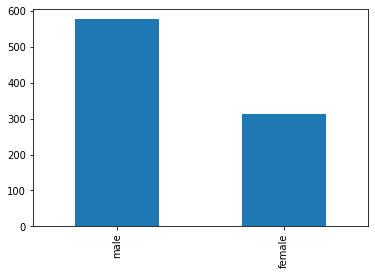

In [5]:
df['Sex'].value_counts().plot.bar()

Not bad, but this chart is quite staid. For one thing, we don't even have a title! Let's fix that. We can pass a keyword argument of title. This will take a string.

<AxesSubplot:title={'center':'Passengers on the Titanic'}>

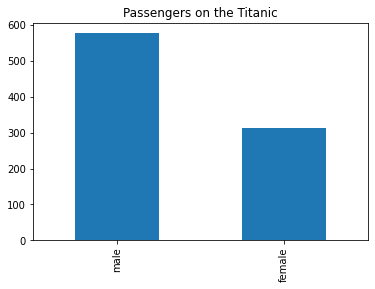

In [6]:
df['Sex'].value_counts().plot.bar(title="Passengers on the Titanic")

We have another serious issue, though. Both types of gender are represented with the same color. This can be difficult for audiences to decipher in some instances, so let's change that. We can pass the keyword argument of color which will take a list of colors.

<AxesSubplot:title={'center':'Passengers on the Titanic'}>

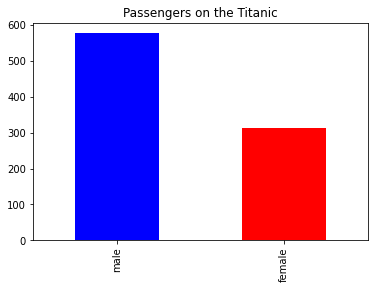

In [7]:
df['Sex'].value_counts().plot.bar(title="Passengers on the Titanic", color=["blue", "red"])

In [ ]:
df['Sex'].value_counts().plot.bar(title="Passengers on the Titanic", color=["blue", "red"])

We can do the same thing with a barh graph, or a bar-horizontal graph.

In [ ]:
df['Sex'].value_counts().plot.barh(title="Passengers on the Titanic", color=["blue", "red"])

## Pie Charts with Pandas

In [ ]:
df['Sex'].value_counts().plot.pie()

In [ ]:
df['Sex'].value_counts().plot.pie(figsize=(6, 6))

Let's say I was interested in the title of the genders not being lowercase. I can add in some custom labels to the data as a keyword argument, labels, which takes a list.

In [ ]:
df['Sex'].value_counts().plot.pie(labels=["Male", "Female"])

Now that we have our labels as we want them, let's give thee audience a bit of a better experience. Let's allow them to easily see the percentage of each gender, not just visually, but quantitatively. To do this, we can pass the keyword argument, autopct, which will take a string. In this case, we can pass in the argument "%.2f" which is a formatted string. This argument will convert our data into a percentage.

In [ ]:
df['Sex'].value_counts().plot.pie(labels=["Male", "Female"], autopct="%.2f")

## Scatter Plots with Pandas

Scatter plots allow us to plot qualitative data quantitatively in relation to two numerical attributes. Let's imagine that we are interested in exploring all passengers, something qualitative. Now, we want to know how each passenger relates to other passengers on two numerical, or quantitative attributes, e.g. the age of the passenger and the fare that they paid. Both of these are quantitative. We can therefore represent each person as a point on the scatter plot and plot them in relation to their fare (vertical, or y axis) and age (horizontal, or x axis) on the graph.

In Pandas we can do this by passing two keyword arguments, x and y and set them both equal to the DataFramee column we want, e.g. "Age" and "Fare".

In [ ]:
df.plot.scatter(x="Age", y="Fare")

That looks good, but we can do better. Let's try to color coordinate this data. Let's say we are interested in seeing not only the passenger's age and fare, but we're also interested in color-coordinating the graph so that their Pclass effects the color of each plot. We can do this by passing a few new keyword arguments.

1) c="Pclass" => c will be the column that affects the color<br>
2) cmap="virdis" => will be the color map we want to use (these are built into Pandas)<br>

In [ ]:
df.plot.scatter(x="Age", y="Fare", c="Pclass",cmap="viridis")

This is starting to look a lot better now. But let's say we didn't want to represent our data as a series of marginally changing numbers. When we pass a DataFrame column to c as a set of numbers, Pandas presumes that that number corresponds to a gradient change in color. But passenger class is not a gradient change, it is a integral change, meaning no one will be Pclass 1.2. They will be 1, 2, or 3. In order to fix this graph, we can make a few changes. First, we can use df.loc that we met in a previous notebook to grab all classes. Now, we know there are three. We can convert these from numerical representations of the class into string representations, e.g. First, Second, and Third.

Next, we can convert that entire column from a string column into a Pandas Categorical Class.

In [ ]:
df.loc[(df.Pclass == 1),'Pclass']="First"
df.loc[(df.Pclass == 2),'Pclass']="Second"
df.loc[(df.Pclass == 3),'Pclass']="Third"

We can now see that our data has now been altered in the Pclass column.

In [ ]:
df

Now that our data is successfully converted into a string, you might be thinking that we can run the same code as before and we should see the data divided between strings, rather than a gradient shift between floats. If we execute the cell below, however, we get a rather large and scary looking error. (Scroll down to see the solution).

In [ ]:
df.plot.scatter(x="Age", y="Fare", c="Pclass", cmap="viridis", s=50)

Keeping this massive error in the textbook is essential, despite its size being rather annoying. It tells us a lot of information about the problem. When we try and pass a keyword argument of c, Pandas is expecting a series of numbers (which will correspond to gradient shifts in the cmap), a list of colors, or a Pandas Categorical column. To change our data to a list of colors, let's convert our data into three different colors.

In [ ]:
df.loc[(df.Pclass == "First"),'Pclass']="red"
df.loc[(df.Pclass == "Second"),'Pclass']="blue"
df.loc[(df.Pclass == "Third"),'Pclass']="green"

In [ ]:
df.plot.scatter(x="Age", y="Fare", c="Pclass")

Now, our plots are all color coordinated. But I don't like this. It doesn't have a nice ledger to read. Instead, we should convert this data into a Categorical Column. To do this, let's first get our data back into First, Second, and Third class format.

In [ ]:
df.loc[(df.Pclass == "red"),'Pclass']="First"
df.loc[(df.Pclass == "blue"),'Pclass']="Second"
df.loc[(df.Pclass == "green"),'Pclass']="Third"

Now, let's try this again by first converting Pclass into a Categorical type.

In [ ]:
df['Pclass'] = df.Pclass.astype('category')

In [ ]:
df.plot.scatter(x="Age", y="Fare", c="Pclass", cmap="viridis")

Now, like magic, we have precisely what we want to see. But we can do even better! Let's say we don't like the size of the nodes (points) on the graph. We want to see smaller nodes to distinguish better between the points. We can pass another keyword argument, s, which stands for size. This expects an integer.

In [ ]:
df.plot.scatter(x="Age", y="Fare", c="Pclass", cmap="viridis", s=5)

To make it a bit easier to read, let's also adjust the size a bit.

In [ ]:
df.plot.scatter(x="Age", y="Fare", c="Pclass", cmap="viridis", s=5, figsize=(15,5))